In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import os
# 운영체제별 한글 폰트 설정
if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [44]:
data1 = pd.read_csv('NHIS_OPEN_GJ_2017_100.csv',encoding='euc-kr')
data2 = pd.read_csv('NHIS_OPEN_GJ_2018_100.csv')

### 2017년과 2018년의 항목
 : 일단 테스트 겸 해보았습니다. 데이터 셋 둘다 항목은 똑같습니다. 그러면? 분석할 때 그냥 두 데이터셋 합쳐서 진행하면 될듯 합니다.

In [45]:
print(data1.columns == data2.columns)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True]


In [46]:
# M, N, O 항목 조사
c1,c2,c3 = '수축기혈압','이완기혈압','식전혈당(공복혈당)'
data1 = data1[[c1,c2,c3]]
data2 = data2[[c1,c2,c3]]


In [47]:
data1.head()


,수축기혈압,이완기혈압,식전혈당(공복혈당)
0,120.0,80.0,99.0
1,130.0,82.0,106.0
2,120.0,70.0,98.0
3,145.0,87.0,95.0
4,138.0,82.0,101.0


In [48]:
data2.head()

,수축기혈압,이완기혈압,식전혈당(공복혈당)
0,110.0,60.0,96.0
1,128.0,78.0,79.0
2,128.0,65.0,80.0
3,151.0,89.0,100.0
4,114.0,62.0,124.0


## Null 개수 확인


In [49]:
data1.isnull().sum() , data2.isnull().sum() 

(수축기혈압         19
 이완기혈압         18
 식전혈당(공복혈당)    42
 dtype: int64,
 수축기혈압         5730
 이완기혈압         5730
 식전혈당(공복혈당)    5915
 dtype: int64)

 : 수아가 확인한 것처럼 혈압과 식전혈당 속성에 대해서도 2018년 데이터는 많은 null 값을 가지는 것으로 나타남.

## 비정상 값 개수 확인

![혈압 분류](./혈압분류.png)
: 혈압의 경우 3도 고혈압 이상의 측정치를 문제가 있다고 봐보자.


In [101]:
print(data1[data1[c1] > 180])
print(data1[data1[c2] > 110])

        수축기혈압  이완기혈압  식전혈당(공복혈당)
90      183.0  109.0       161.0
162     184.0  104.0        96.0
310     195.0   90.0       114.0
679     184.0  100.0       153.0
1437    184.0  134.0       103.0
...       ...    ...         ...
994861  190.0   90.0        90.0
994980  181.0  134.0        94.0
996484  200.0  110.0       107.0
997349  185.0   86.0       110.0
999713  207.0  125.0       113.0

[1279 rows x 3 columns]
        수축기혈압  이완기혈압  식전혈당(공복혈당)
189     163.0  115.0       113.0
286     180.0  115.0        97.0
595     165.0  111.0       113.0
610     152.0  112.0       134.0
807     165.0  111.0        91.0
...       ...    ...         ...
997240  160.0  120.0        98.0
998204  180.0  128.0       103.0
998687  170.0  130.0        98.0
999713  207.0  125.0       113.0
999785  156.0  120.0       115.0

[2352 rows x 3 columns]


In [102]:
print(data2[data2[c1] > 180])
print(data2[data2[c2] > 110])

        수축기혈압  이완기혈압  식전혈당(공복혈당)
597     200.0  127.0        98.0
676     182.0   92.0       283.0
4173    200.0  110.0       116.0
4883    190.0  127.0        92.0
4934    191.0  114.0        81.0
...       ...    ...         ...
997933  185.0  120.0        99.0
998766  214.0  152.0       102.0
999423  184.0  118.0       112.0
999469  200.0  120.0       136.0
999532  188.0  102.0       114.0

[1424 rows x 3 columns]
        수축기혈압  이완기혈압  식전혈당(공복혈당)
230     155.0  115.0       114.0
458     175.0  117.0       113.0
597     200.0  127.0        98.0
1571    163.0  115.0       106.0
2224    171.0  120.0       100.0
...       ...    ...         ...
999109  140.0  113.0        90.0
999222  160.0  120.0        83.0
999423  184.0  118.0       112.0
999469  200.0  120.0       136.0
999472  156.0  111.0       131.0

[2512 rows x 3 columns]


17, 18년도 모두 대략 1200~2500개의 비정상 수치가 나온다. 하지만, 정말 초초고혈압인 사람들일수도 있기 때문에 이를 어떻게 배제할지 기준을 정해야 할 것 같다.

## 기본 자료 분석 (Max, Min, Avg)

In [50]:
print("17년 수축기 혈압 max : ",data1[c1].max())
print("17년 이완기 혈압 max : ",data1[c2].max())
print("17년 식전혈당 max : ",data1[c3].max(), end="\n\n")

print("17년 수축기 혈압 min : ",data1[c1].min())
print("17년 이완기 혈압 min : ",data1[c2].min())
print("17년 식전혈당 min : ",data1[c3].min(), end='\n\n')

print("17년 수축기 혈압 avg : ",data1[c1].mean())
print("17년 이완기 혈압 avg : ",data1[c2].mean())
print("17년 식전혈당 avg : ",data1[c3].mean(), end="\n\n")

print("18년 수축기 혈압 max : ",data2[c1].max())
print("18년 이완기 혈압 max : ",data2[c2].max())
print("18년 식전혈당 max : ",data2[c2].max(), end='\n\n')

print("18년 수축기 혈압 max : ",data2[c1].min())
print("18년 이완기 혈압 max : ",data2[c2].min())
print("18년 식전혈당 max : ",data2[c3].min(), end="\n\n")

print("18년 수축기 혈압 max : ",data2[c1].mean())
print("18년 이완기 혈압 max : ",data2[c2].mean())
print("18년 식전혈당 max : ",data2[c3].mean(), end="\n\n")

17년 수축기 혈압 max :  273.0
17년 이완기 혈압 max :  185.0
17년 식전혈당 max :  852.0

17년 수축기 혈압 min :  58.0
17년 이완기 혈압 min :  30.0
17년 식전혈당 min :  25.0

17년 수축기 혈압 avg :  122.42755212349034
17년 이완기 혈압 avg :  76.04864087553575
17년 식전혈당 avg :  100.4531680330574

18년 수축기 혈압 max :  267.0
18년 이완기 혈압 max :  173.0
18년 식전혈당 max :  173.0

18년 수축기 혈압 max :  63.0
18년 이완기 혈압 max :  27.0
18년 식전혈당 max :  23.0

18년 수축기 혈압 max :  122.66933529121869
18년 이완기 혈압 max :  76.07427761070936
18년 식전혈당 max :  100.86801531056197



식전혈당 max가 852? 이건 문제가 있다...(min 25또한...) 혈압과 더불어, 어느 기준 이상/이하를 배제할지 정하자.

: AHA(American Heart Association)의 분류법을 근거로 고혈압 데이터 분류
  (수축기: 140 이상 or 이완기: 90이상)
 

In [76]:
df_2017_c1 = data1[data1[c1] >= 140]
df_2017_c2 = data1[data1[c2] >= 90]
df_2017_or = data1[(data1[c1] >= 140) | (data1[c2] >= 90)] 

In [95]:
# print(df_2017_c1)
# print(df_2017_c2)
print(df_2017_or)

        수축기혈압  이완기혈압  식전혈당(공복혈당)
3       145.0   87.0        95.0
5       142.0   92.0        99.0
8       145.0   85.0       104.0
9       132.0  105.0       100.0
37      167.0   84.0       128.0
...       ...    ...         ...
999967  144.0   88.0       126.0
999968  151.0   97.0       107.0
999971  140.0   80.0        97.0
999973  143.0   90.0       126.0
999974  143.0   90.0       101.0

[128488 rows x 3 columns]


In [86]:
df_2018_c1 = data2[data2[c1] >= 140]
df_2018_c2 = data2[data2[c2] >= 90]
df_2018_or = data2[(data2[c1] >= 140) | (data2[c2] >= 90)] 

In [87]:
# print(df_2018_c1)
# print(df_2018_c2)
print(df_2018_or)

        수축기혈압  이완기혈압  식전혈당(공복혈당)
3       151.0   89.0       100.0
6       119.0   93.0        80.0
8       141.0   91.0        85.0
9       142.0   87.0       111.0
11      144.0   88.0       117.0
...       ...    ...         ...
999981  146.0   69.0        99.0
999983  134.0   96.0       105.0
999984  140.0   80.0        94.0
999997  162.0   90.0        98.0
999998  140.0   98.0        94.0

[135472 rows x 3 columns]


In [93]:
print("2017 고혈압 인원: " ,len(df_2017_or))
print("2017 고혈압 비율: " , len(df_2017_or)/len(data1) * 100 ,"%")

2017 고혈압 인원:  128488
2017 고혈압 비율:  12.848799999999999 %


In [94]:
print("2018 고혈압 인원: " ,len(df_2018_or))
print("2018 고혈압 비율: " , len(df_2018_or)/len(data2) * 100 ,"%")

2018 고혈압 인원:  135472
2018 고혈압 비율:  13.5472 %


: 17, 18년 데이터 모두 고혈압 인원 비중은 12~13%.


아 근데 널값 빼고, 이상 수치 빼고 해야하는데 이건 나중에,,,

In [118]:
diabetes_2017= data1[data1[c3] >= 126]
warn_diabetes_2017 = data1[(data1[c3] >= 100) & (data1[c3] <= 125)]

diabetes_2018= data2[data2[c3] >= 126]
warn_diabetes_2018 = data2[(data2[c3] >= 100) & (data2[c3] <= 125)]

In [119]:
print(diabetes_2017)
print(warn_diabetes_2017)

        수축기혈압  이완기혈압  식전혈당(공복혈당)
11      109.0   69.0       137.0
37      167.0   84.0       128.0
75      149.0   90.0       155.0
76      130.0   80.0       160.0
85      120.0   74.0       140.0
...       ...    ...         ...
999938  143.0   86.0       151.0
999947  133.0   69.0       138.0
999967  144.0   88.0       126.0
999970  125.0   71.0       152.0
999973  143.0   90.0       126.0

[77215 rows x 3 columns]
        수축기혈압  이완기혈압  식전혈당(공복혈당)
1       130.0   82.0       106.0
4       138.0   82.0       101.0
8       145.0   85.0       104.0
9       132.0  105.0       100.0
12      130.0   80.0       106.0
...       ...    ...         ...
999975   95.0   52.0       100.0
999980  110.0   70.0       104.0
999987  110.0   60.0       115.0
999990  139.0   83.0       109.0
999994  116.0   74.0       108.0

[297471 rows x 3 columns]


In [120]:
print(diabetes_2018)
print(warn_diabetes_2018)

        수축기혈압  이완기혈압  식전혈당(공복혈당)
12      144.0   91.0       145.0
13      110.0   65.0       141.0
17      129.0   89.0       183.0
37      109.0   83.0       154.0
41      123.0   84.0       142.0
...       ...    ...         ...
999936  114.0   62.0       137.0
999940  146.0  101.0       143.0
999942  132.0   66.0       150.0
999977  132.0   96.0       160.0
999991  110.0   76.0       217.0

[78685 rows x 3 columns]
        수축기혈압  이완기혈압  식전혈당(공복혈당)
3       151.0   89.0       100.0
4       114.0   62.0       124.0
7       137.0   71.0       122.0
9       142.0   87.0       111.0
11      144.0   88.0       117.0
...       ...    ...         ...
999983  134.0   96.0       105.0
999987  107.0   76.0       114.0
999989  119.0   68.0       101.0
999995  110.0   70.0       107.0
999996  136.0   88.0       114.0

[306894 rows x 3 columns]


In [123]:
print("2017 당뇨병 인원: " ,len(diabetes_2017))
print("2017 공복혈당장애 인원: " ,len(warn_diabetes_2017))
print("2017 당뇨병 비율: " , len(diabetes_2017)/len(data1) * 100 ,"%")
print("2017 공복혈당장애+당뇨병 비율: " , (len(diabetes_2017)+ len(warn_diabetes_2017))/len(data1) * 100 ,"%")

2017 당뇨병 인원:  77215
2017 공복혈당장애 인원:  297471
2017 당뇨병 비율:  7.721500000000001 %
2017 공복혈당장애+당뇨병 비율:  37.4686 %


In [124]:
print("2018 당뇨병 인원: " ,len(diabetes_2018))
print("2018 공복혈당장애 인원: " ,len(warn_diabetes_2018))
print("2018 당뇨병 비율: " , len(diabetes_2018)/len(data2) * 100 ,"%")
print("2018 공복혈당장애+당뇨병 비율: " , (len(diabetes_2018)+ len(warn_diabetes_2018))/len(data1) * 100 ,"%")

2018 당뇨병 인원:  78685
2018 공복혈당장애 인원:  306894
2018 당뇨병 비율:  7.868500000000001 %
2018 공복혈당장애+당뇨병 비율:  38.557900000000004 %


: 자 여기까지 정리해보면, 고혈압 인원은 12 ~ 13%. 당뇨병 인원은 7 ~ 8%이다. 즉, 당뇨병이어도 고혈압이 아닌 사람이 꽤 있음.
또한, 당뇨병 위험군으로 분리되는 '공복혈당장애'는 전체 37 ~ 38%의 비중인데 막상 실제 당뇨병은 7 ~ 8%로 30%정도의 인원은 당뇨병 진단을 받지 않음.

In [148]:
print("2017 당뇨병/고혈압 비율: " , len(diabetes_2017)/len(df_2017_or) * 100 ,"%")
print("2018 당뇨병/고혈압 비율: " , len(diabetes_2018)/len(df_2018_or) * 100 ,"%")


2017 당뇨병/고혈압 비율:  60.09510615777349 %
2018 당뇨병/고혈압 비율:  58.082112908940594 %


## Outlier 관련
: 이 부분은 차트만 띄워보고 추후 통계 공부 후 기준을 잡아야 할 듯 하다. 잘 모르겠다,,


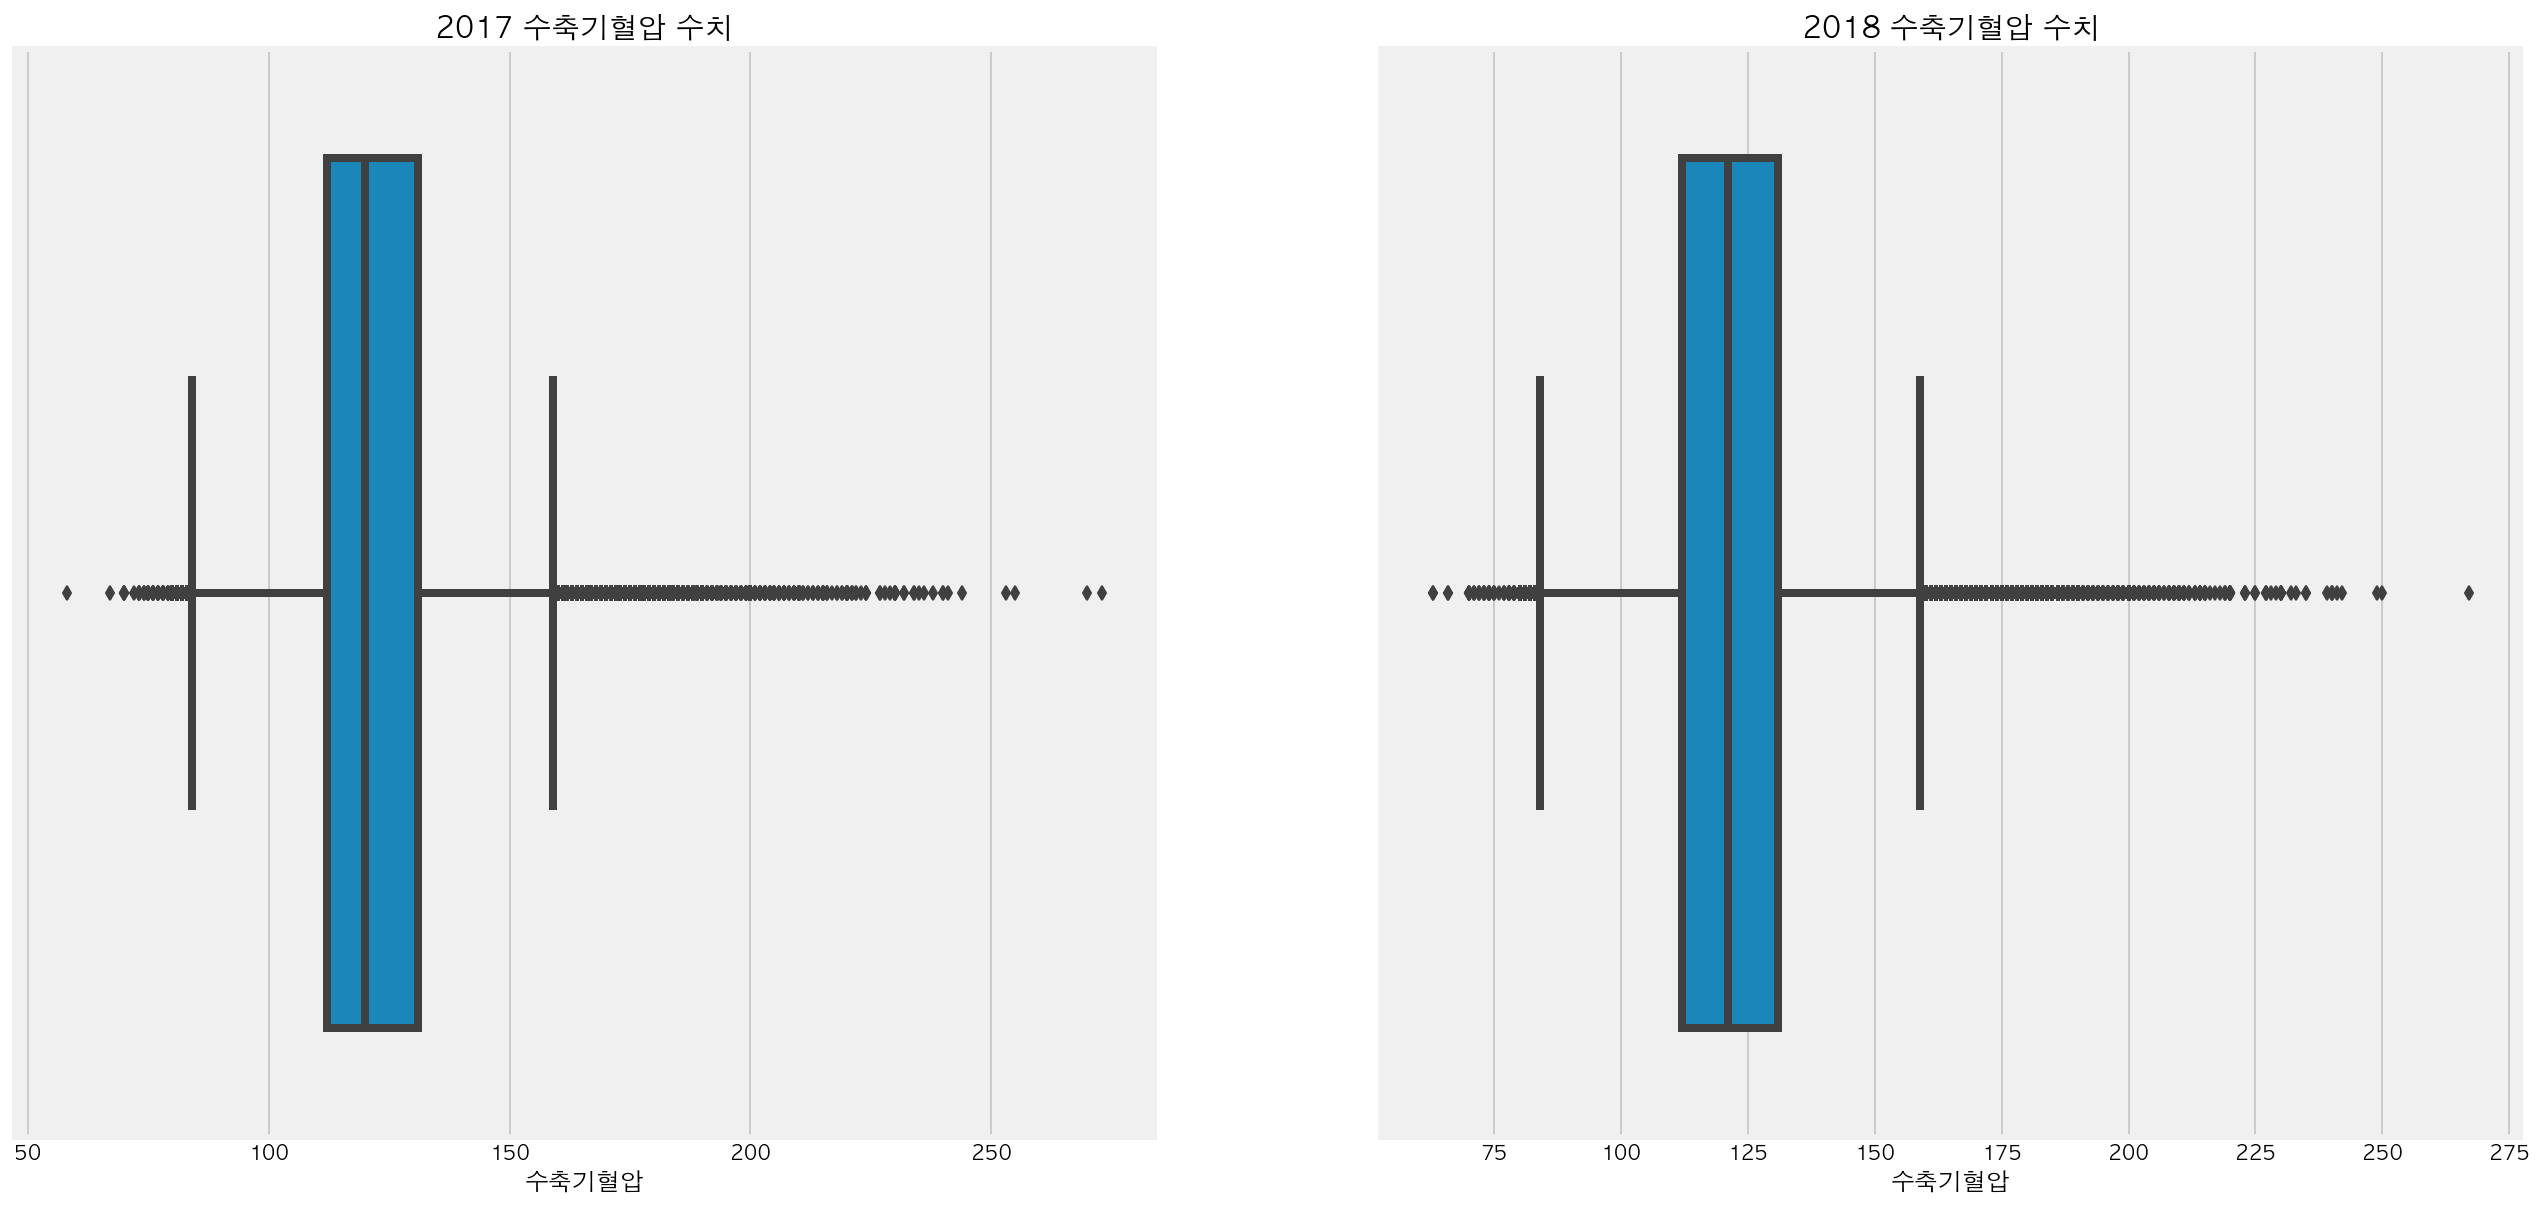

In [129]:
f, ax = plt.subplots(1,2, figsize=(20,10))
sns.boxplot(x=c1, data=data1, ax=ax[0])
ax[0].set_title('2017 수축기혈압 수치')
sns.boxplot(x=c1, data=data2, ax=ax[1])
ax[1].set_title('2018 수축기혈압 수치')
plt.show()

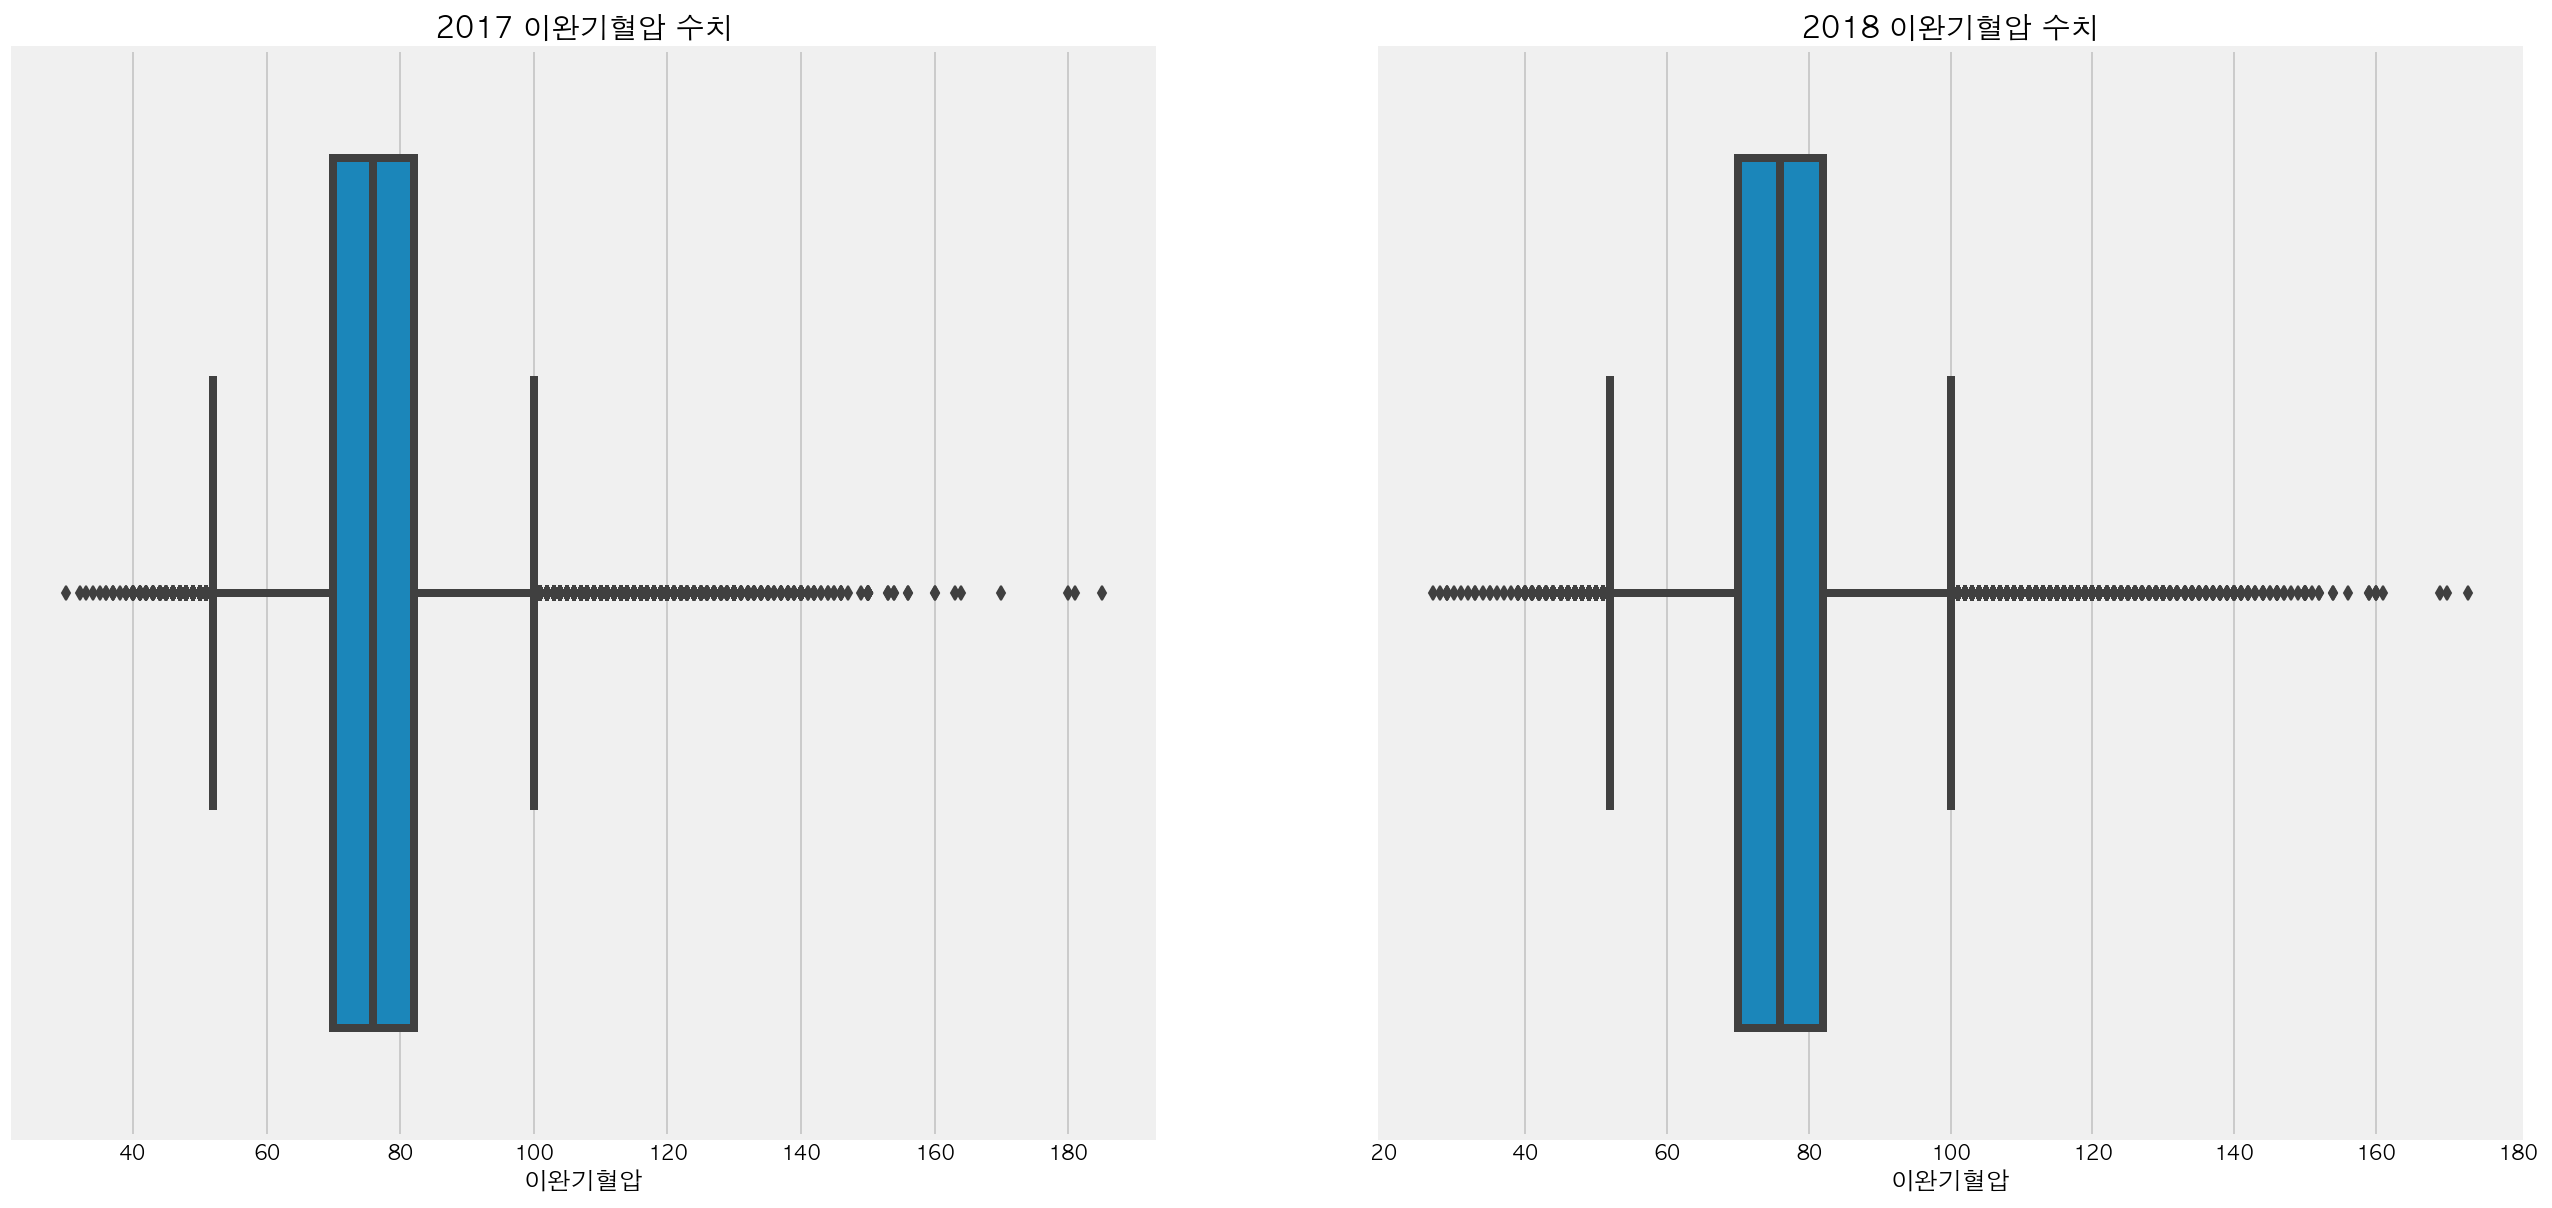

In [130]:
f, ax = plt.subplots(1,2, figsize=(20,10))
sns.boxplot(x=c2, data=data1, ax=ax[0])
ax[0].set_title('2017 이완기혈압 수치')
sns.boxplot(x=c2, data=data2, ax=ax[1])
ax[1].set_title('2018 이완기혈압 수치')
plt.show()

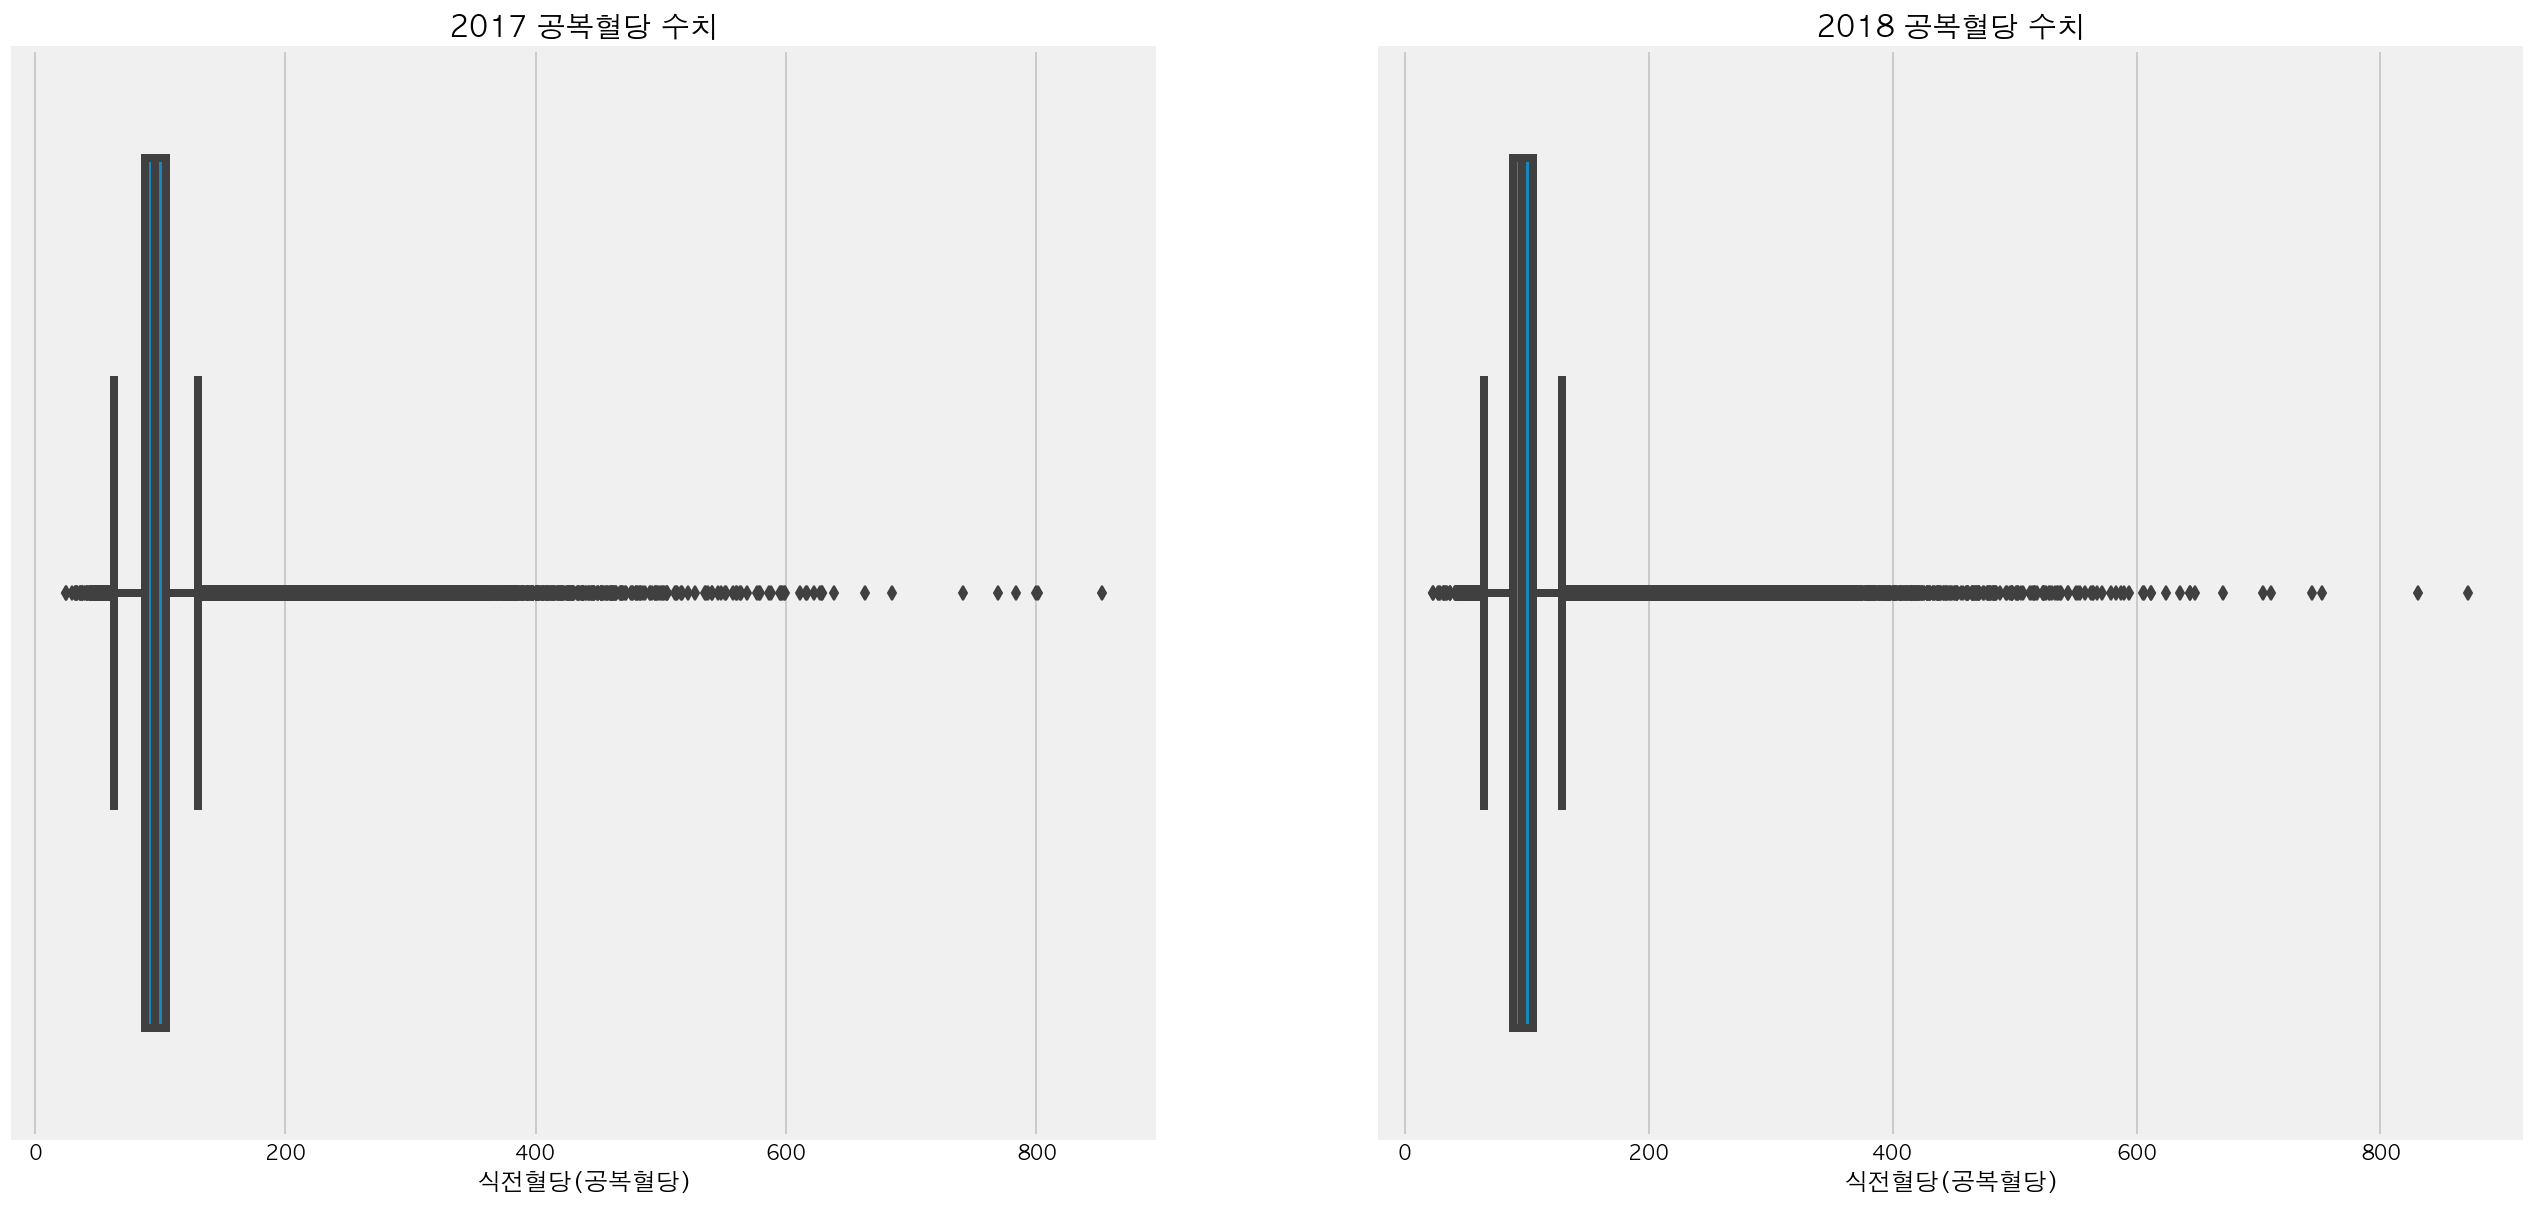

In [139]:
f, ax = plt.subplots(1,2, figsize=(20,10))
sns.boxplot(x=c3, data=data1, ax=ax[0])
ax[0].set_title('2017 공복혈당 수치')
sns.boxplot(x=c3, data=data2, ax=ax[1])
ax[1].set_title('2018 공복혈당 수치')
plt.show()

In [132]:
df = data1.copy()
for c in df.columns:
    if df[c].dtype == float or df[c].dtype == int:
        q1 = df[c].quantile(.25)
        q3 = df[c].quantile(.75)
        IQR = q3 - q1
        df = df[df[c].between(q1 - 1.5 * IQR, q3 + 1.5 * IQR, inclusive=True)]
        print("Column : " + c + "\'s outliers which out of IQR are removed.")
df.reset_index(drop=True, inplace=True)

Column : 수축기혈압's outliers which out of IQR are removed.
Column : 이완기혈압's outliers which out of IQR are removed.
Column : 식전혈당(공복혈당)'s outliers which out of IQR are removed.


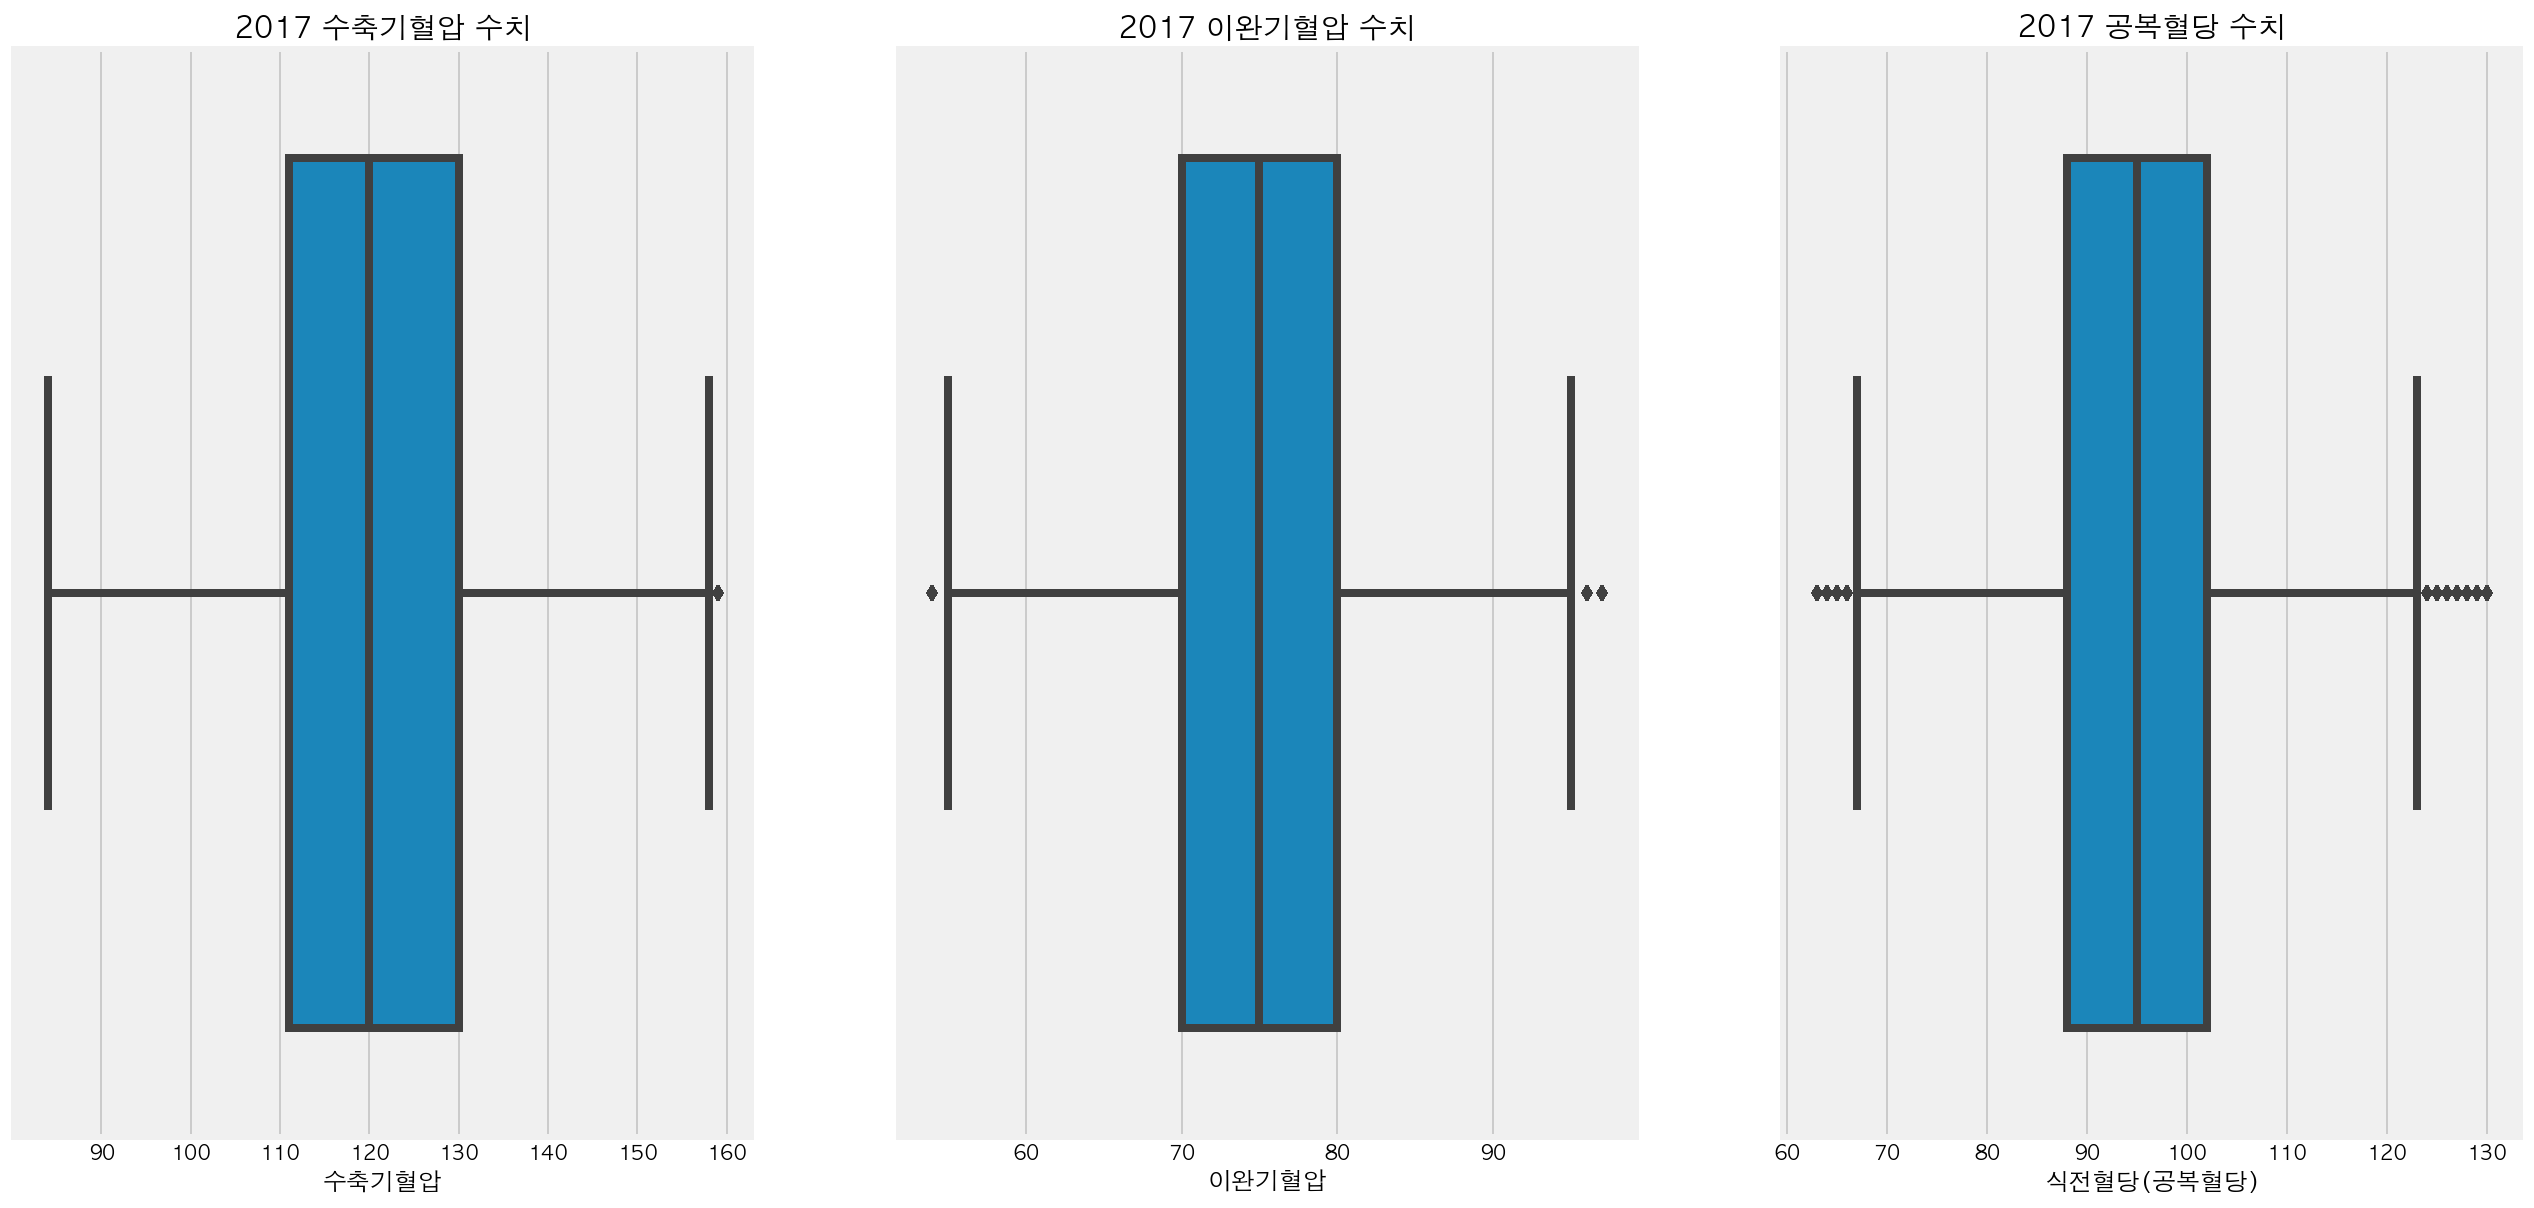

In [138]:
f, ax = plt.subplots(1,3, figsize=(20,10))
sns.boxplot(x=c1, data=df, ax=ax[0])
ax[0].set_title('2017 수축기혈압 수치')
sns.boxplot(x=c2, data=df, ax=ax[1])
ax[1].set_title('2017 이완기혈압 수치')
sns.boxplot(x=c3, data=df, ax=ax[2])
ax[2].set_title('2017 공복혈당 수치')

plt.show()

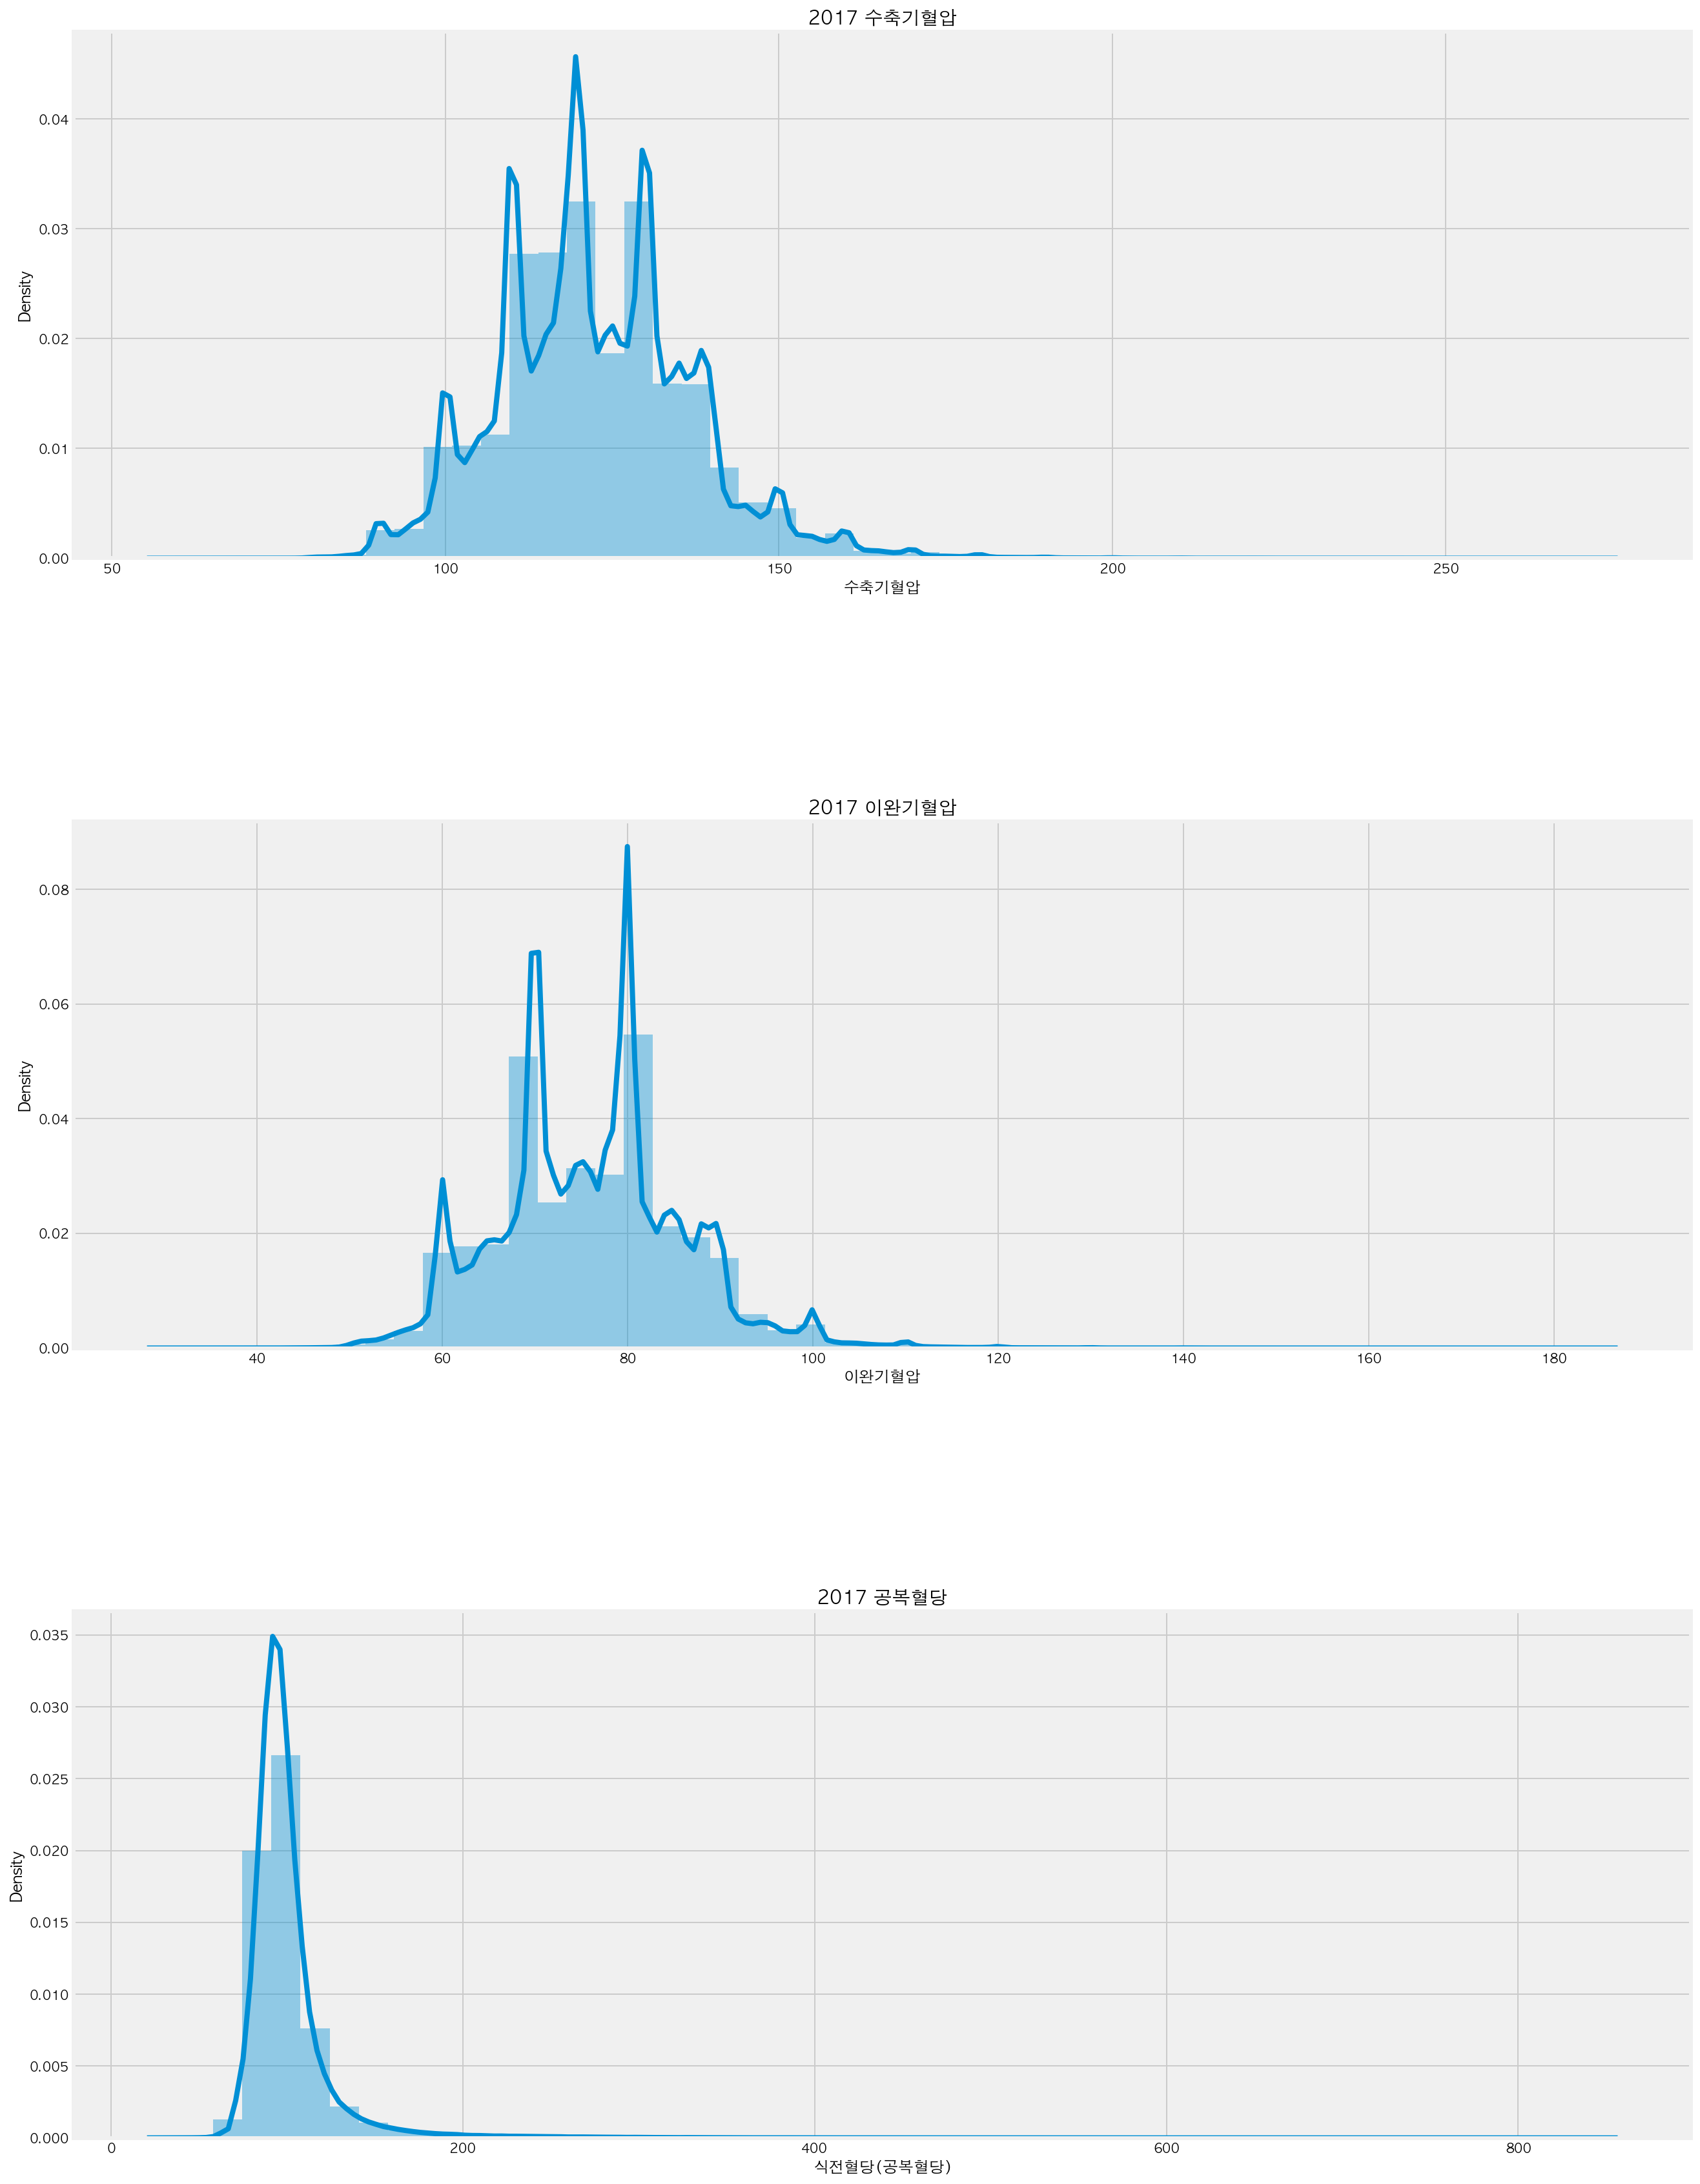

In [144]:
f, ax = plt.subplots(3,1, figsize=(20,30))
sns.distplot(data1[c1],ax=ax[0])
ax[0].set_title('2017 수축기혈압')
sns.distplot(data1[c2],ax=ax[1])
ax[1].set_title('2017 이완기혈압')
sns.distplot(data1[c3],ax=ax[2])
ax[2].set_title('2017 공복혈당')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

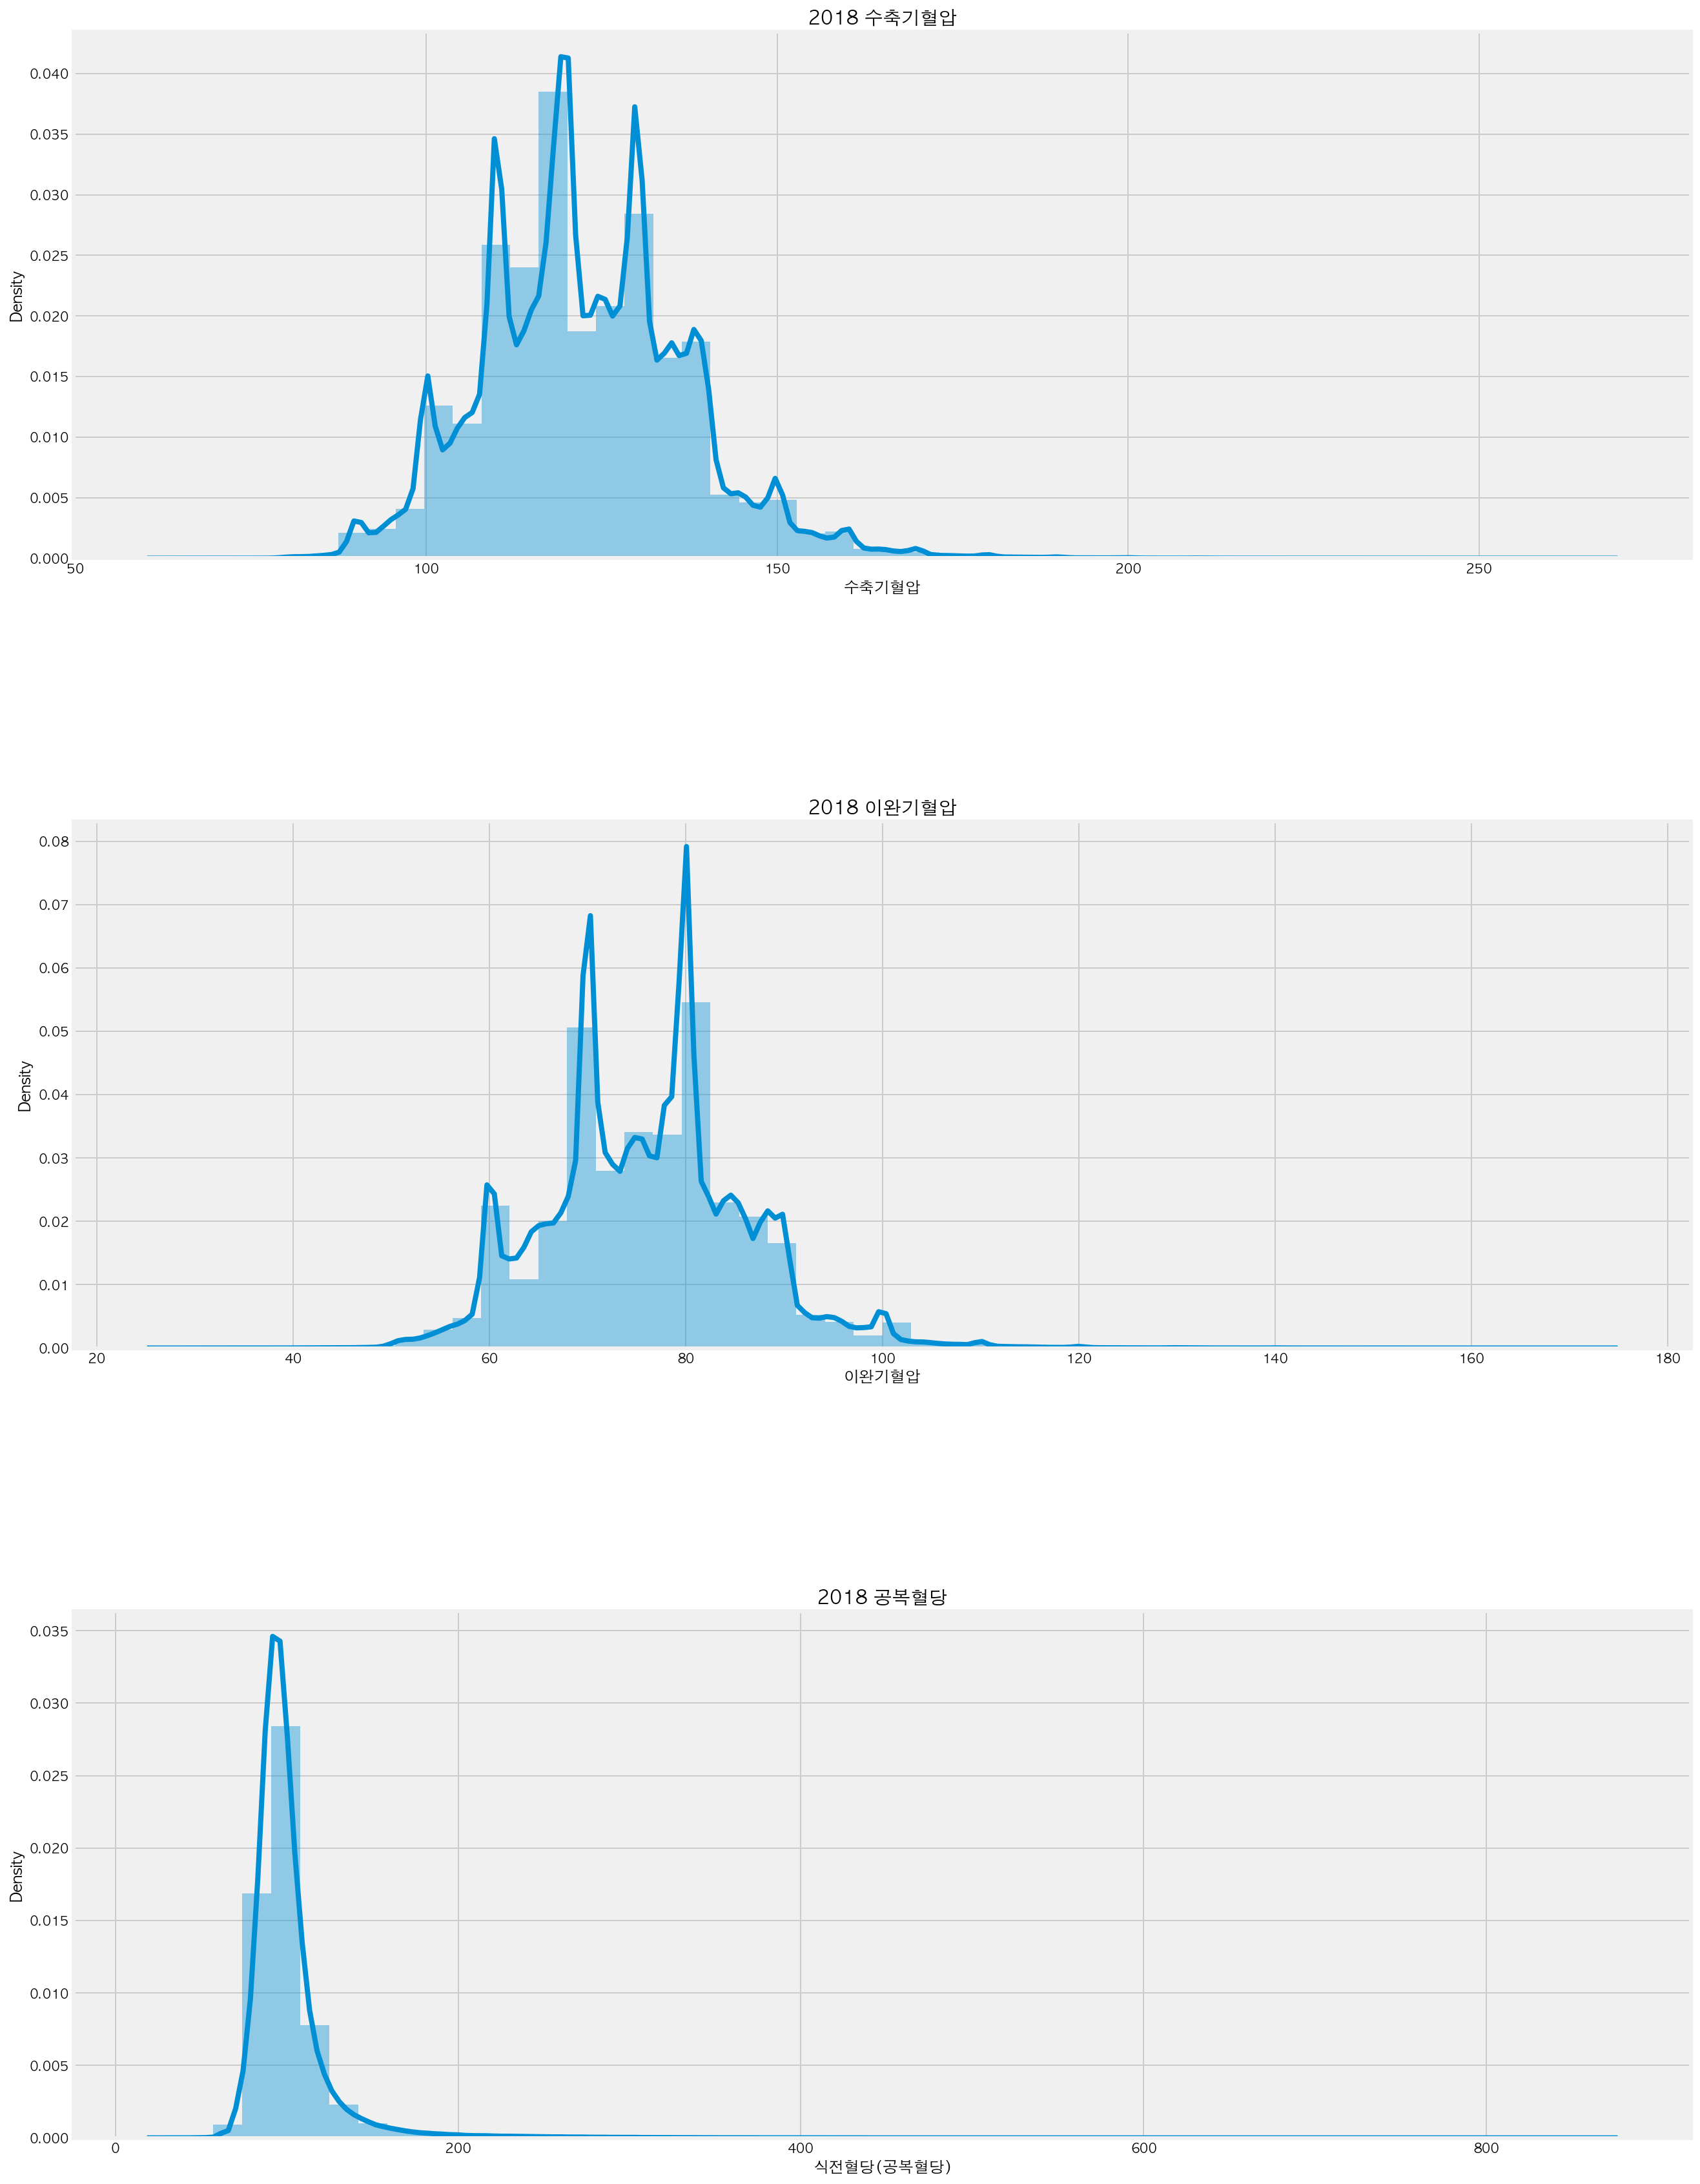

In [145]:
f, ax = plt.subplots(3,1, figsize=(20,30))
sns.distplot(data2[c1],ax=ax[0])
ax[0].set_title('2018 수축기혈압')
sns.distplot(data2[c2],ax=ax[1])
ax[1].set_title('2018 이완기혈압')
sns.distplot(data2[c3],ax=ax[2])
ax[2].set_title('2018 공복혈당')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

## 정리
 : **어느 속성이든 ~값 이상/이하로 값을 제거하는 기준이 필요하다. 이 기준을 세우고, 위에서 구한 당뇨/고혈압 (or 고혈압/당뇨) 등의 비율을 구하면 의미 있는 수치가 나올 것 같다.** 또한, 이번에는 수아님이 조사한 방법을 기초하여 차트를 띄웠는데 다음부터 matplotlib,pandas 등 패키지의 기초 사용법을 익혀 오겠다.